An Exploration into a dataset from the Costumers of a Multi-National Bank
in this code we learn more Sns and different algorithms that are used in predicting the behavior of Costumers
The Address : https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

1-importing the necessary libraries

In [137]:
#there are more libraries up ahead but i imported them later to avoid confusion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import itertools
import seaborn as sns
%matplotlib inline

2-Reading the Data set

In [138]:
df=pd.read_csv(r'C:\Users\user\Downloads\Churn_Modelling.csv')
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

3-Exploring The Dataset Using Seaborn(sns)Library

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


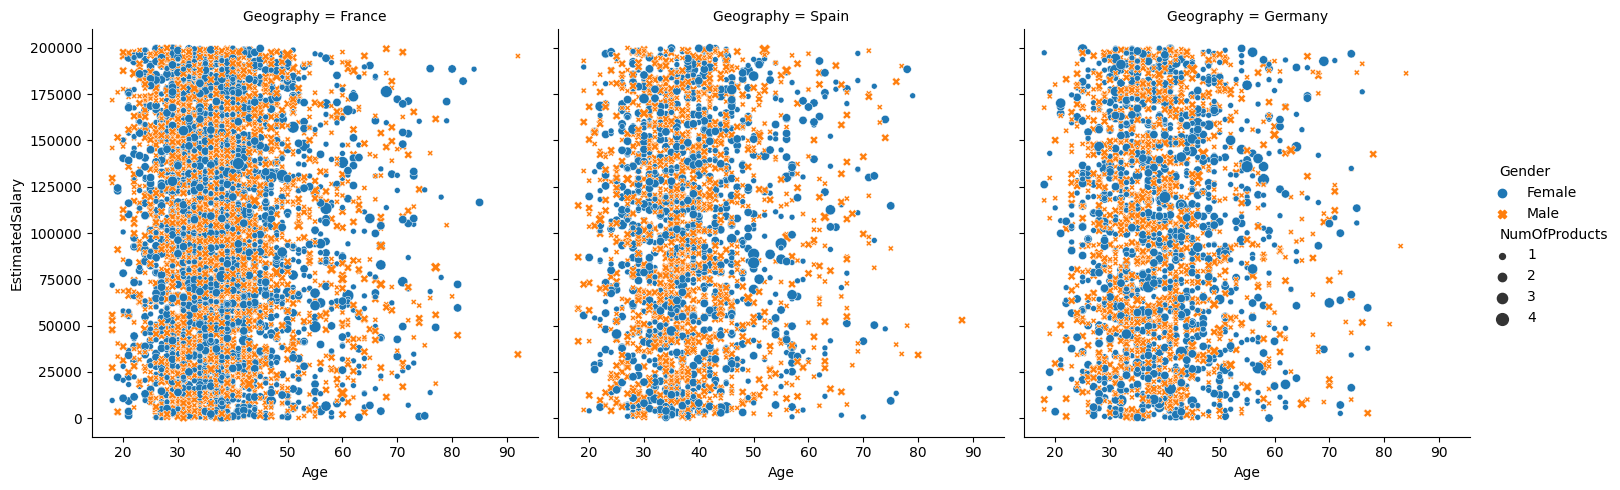

In [140]:
sns.relplot(
    data=df,
    x='Age', y='EstimatedSalary', col='Geography',
    hue='Gender', style='Gender', size="NumOfProducts",
)

<AxesSubplot: xlabel='Geography', ylabel='Exited'>

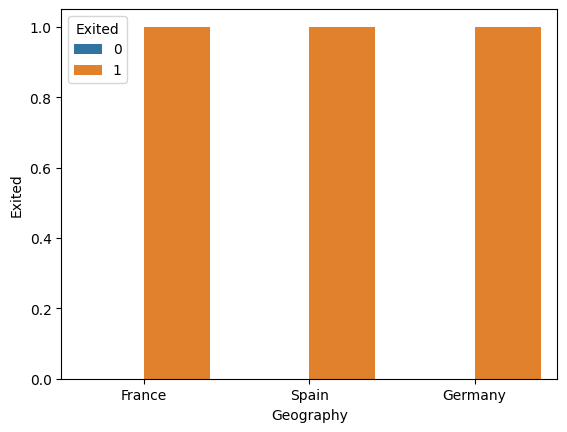

In [141]:
sns.barplot(x='Geography',
    y='Exited',
    hue='Exited',
    data=df,)

<AxesSubplot: xlabel='IsActiveMember', ylabel='count'>

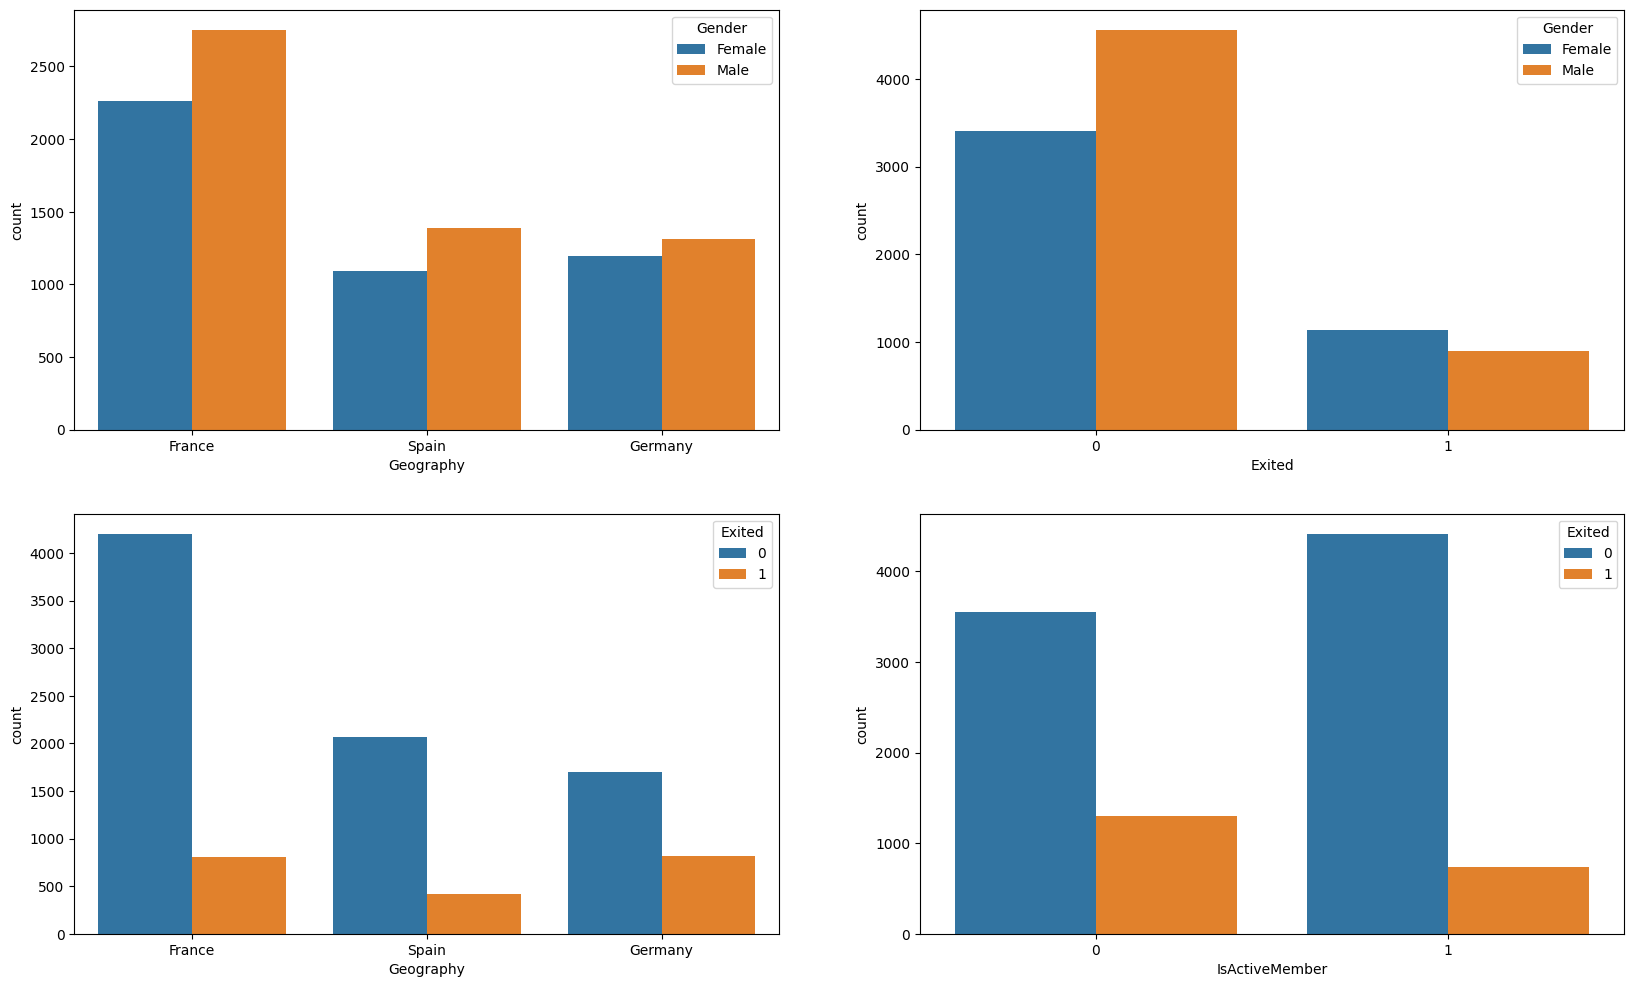

In [142]:
#Setting the numbers of windows
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
#Setting the INs of each window
sns.countplot(x='Geography', hue = 'Gender',data = df, ax=axarr[0][0])
sns.countplot(x='Exited',hue='Gender',data=df,ax=axarr[0][1])
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [143]:
#all the columns we have and we can use
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<AxesSubplot: xlabel='Geography', ylabel='CreditScore'>

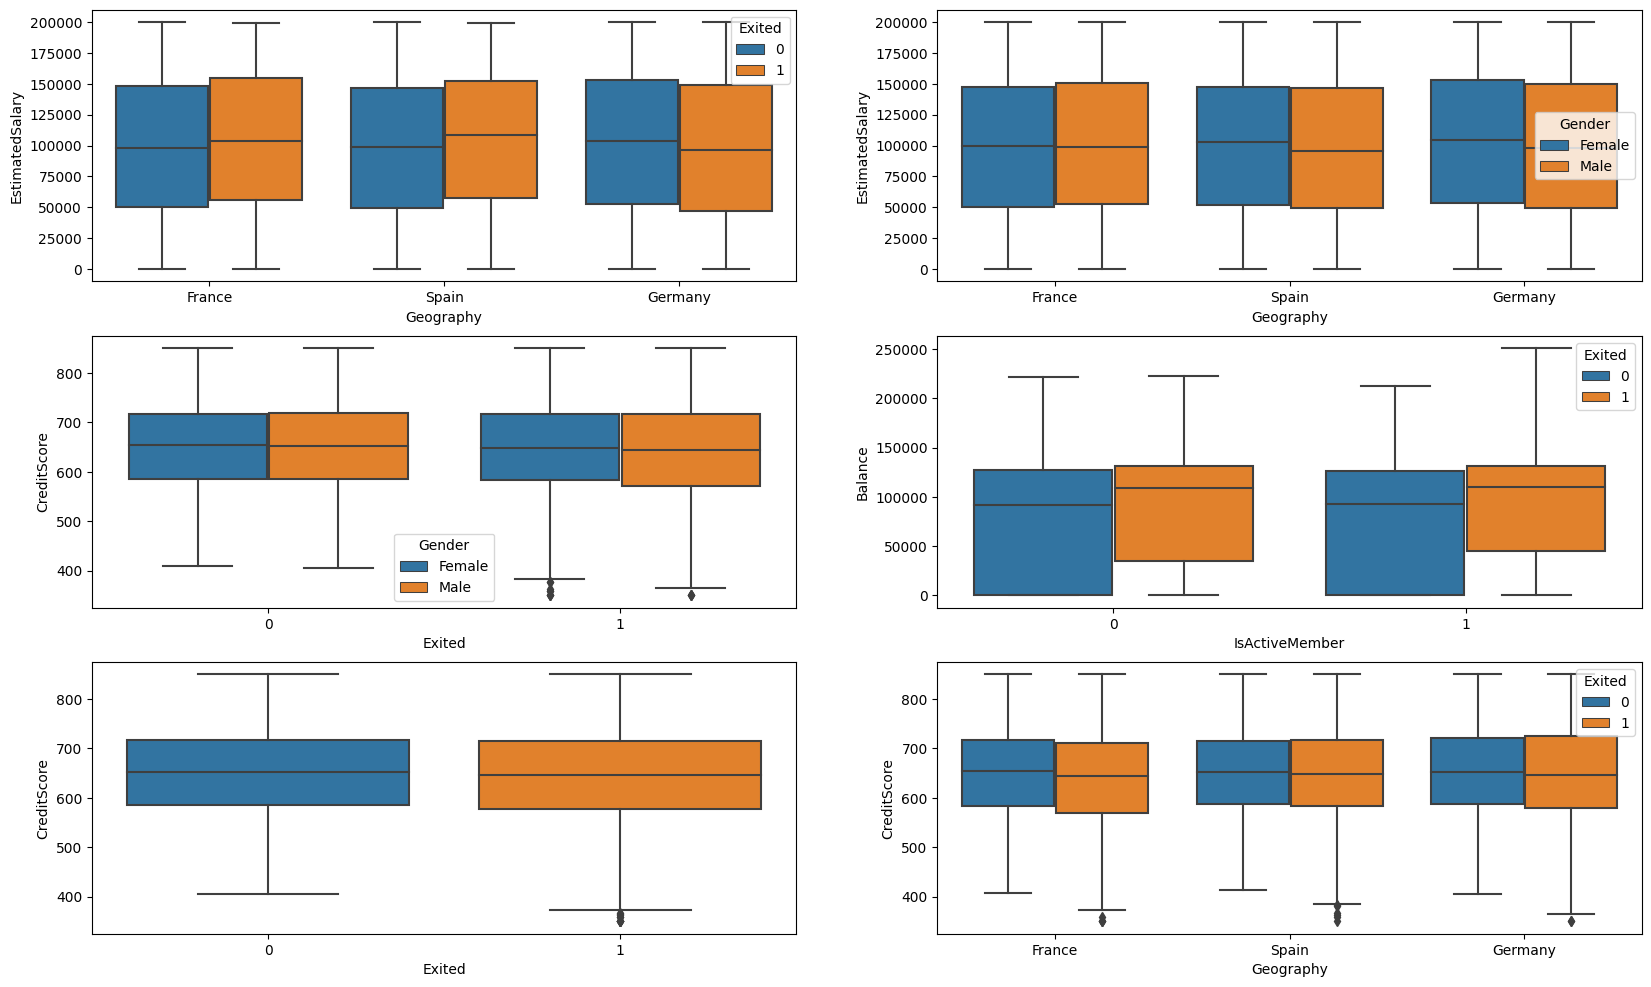

In [144]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='EstimatedSalary',x='Geography',hue='Gender',data=df,ax=axarr [0][1])
sns.boxplot(y='EstimatedSalary',x='Geography',hue='Exited',data=df,ax=axarr[0][0])
sns.boxplot(y='Balance',x='IsActiveMember',hue='Exited',data=df,ax=axarr[1][1])
sns.boxplot(y='CreditScore',x='Exited',hue='Gender',data=df,ax=axarr[1][0])
sns.boxplot(y='CreditScore',x='Exited',data=df,ax=axarr[2][0])
sns.boxplot(y='CreditScore',x='Geography',hue='Exited',data=df,ax=axarr[2][1])


3.5-Here's a Mistake I Made Myself While Working With This Dataset,The Difference Between Boxplot And Boxenplot Functions So I decided To Make A Cell Specifically To it

<AxesSubplot: xlabel='IsActiveMember', ylabel='Balance'>

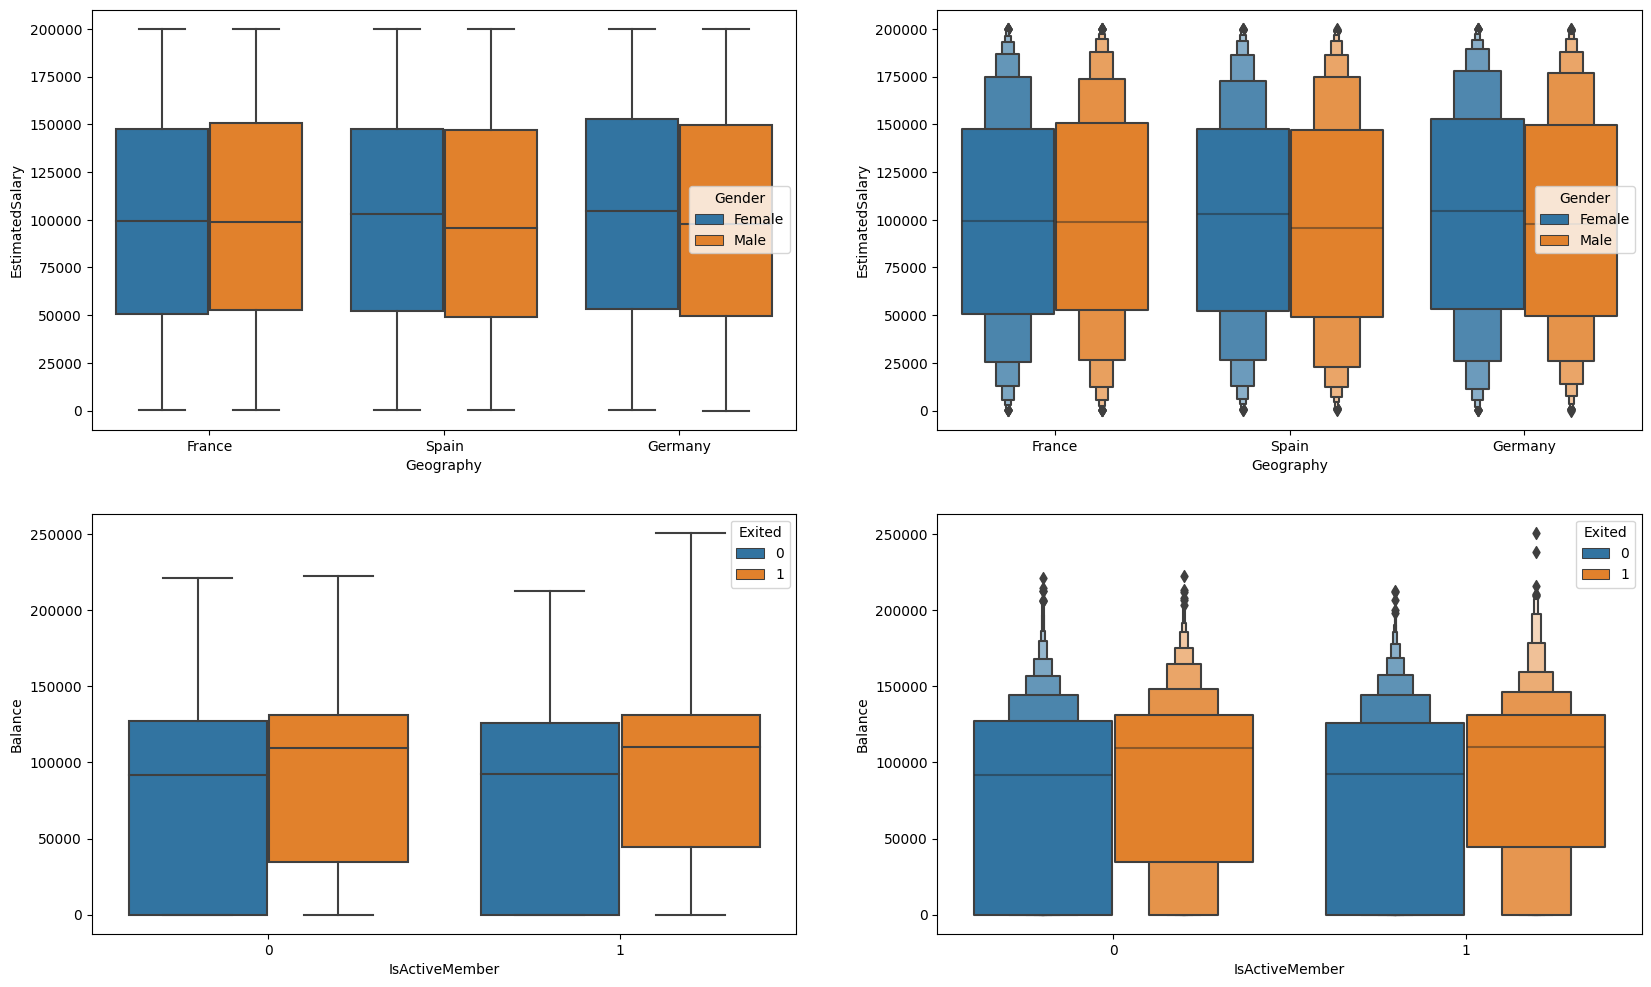

In [145]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='EstimatedSalary',x='Geography',hue='Gender',data=df,ax=axarr [0][0])
sns.boxplot(y='Balance',x='IsActiveMember',hue='Exited',data=df,ax=axarr[1][0])
sns.boxenplot(y='EstimatedSalary',x='Geography',hue='Gender',data=df,ax=axarr [0][1])
sns.boxenplot(y='Balance',x='IsActiveMember',hue='Exited',data=df,ax=axarr[1][1])

4-Normalizing The Dataset

Datas Such As Id,Name Or RowNumber Are Basically Useless And Not Needed So We Remove Them To Make Our Work Easier

In [146]:
df.drop(['RowNumber','CustomerId', 'Surname'],axis=1,inplace=True)

As We Saw Above There Are Some Datas That Are Not In Int Or Float Form And Can't Be Used Unless Modified

In [147]:
df['Geography'].unique()
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['Geography']=df['Geography'].map({'France':0,'Spain':1,'Germany':2})

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [148]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [149]:
x=df.drop(['Exited','NumOfProducts'],axis=1)
y=df['Exited']

5-Training

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [151]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [152]:
#The rest of the libraries that are imported,but werent imported above because most of them will not be used more than once or twice
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
model1 = XGBClassifier()
model2 = RandomForestClassifier()
model3 = SVC()
model4 = KNeighborsClassifier()
model5 = DecisionTreeClassifier()


In [153]:
def accuracy(model):    
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    return y_test,y_predict

In [154]:
models=[model1,model2,model3,model4,model5]
count=0

for model in models:
    count+=1
    y_test, y_predict=accuracy(model)
    print("Model ", count,":", model)
    print('Accuracy score:',accuracy_score(y_test, y_predict))
    print('F1 score:',f1_score(y_test, y_predict))


Model  1 : XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
Accuracy score: 0.822
F1 score: 0.463855421686747
Model  2 : RandomForestClassifier()
Accuracy score: 0.83
F1 score: 0.48170731707317077
Model  3 : SVC()
Accuracy score: 0.823
F1 score: 0.3678571428571428
Model  4 : KNeighborsClassifier()
Accuracy score: 0.803
F1 score: 0.37

With That We Saw That The RFC Works Very Good With Our Dataset So We Use It

In [155]:
rf= RandomForestClassifier()
hist=rf.fit(X_train,y_train)
y_predict=rf.predict(X_test)

6-Evaluation

In [156]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1578
           1       0.68      0.37      0.48       422

    accuracy                           0.83      2000
   macro avg       0.77      0.66      0.69      2000
weighted avg       0.81      0.83      0.81      2000

Confusion matrix, without normalization
[[1505   73]
 [ 266  156]]


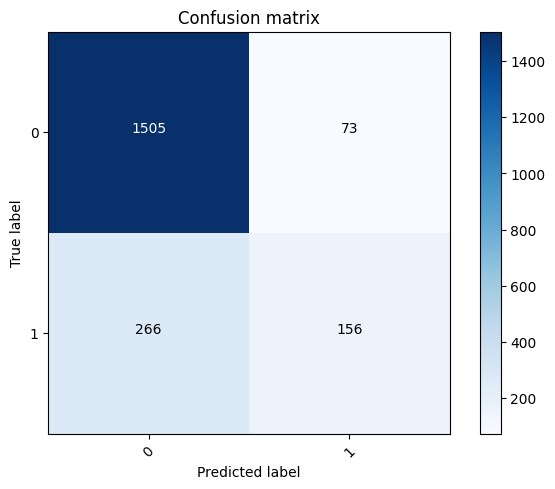

In [157]:
conf_matrix= confusion_matrix(y_test,y_predict)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [158]:
f1_score(y_test,y_predict, average='weighted') 

0.810258493834737